In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["font.size"] = 14


df = pd.read_csv("AppleStore.csv")

df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

Text(0,0.5,'Number')

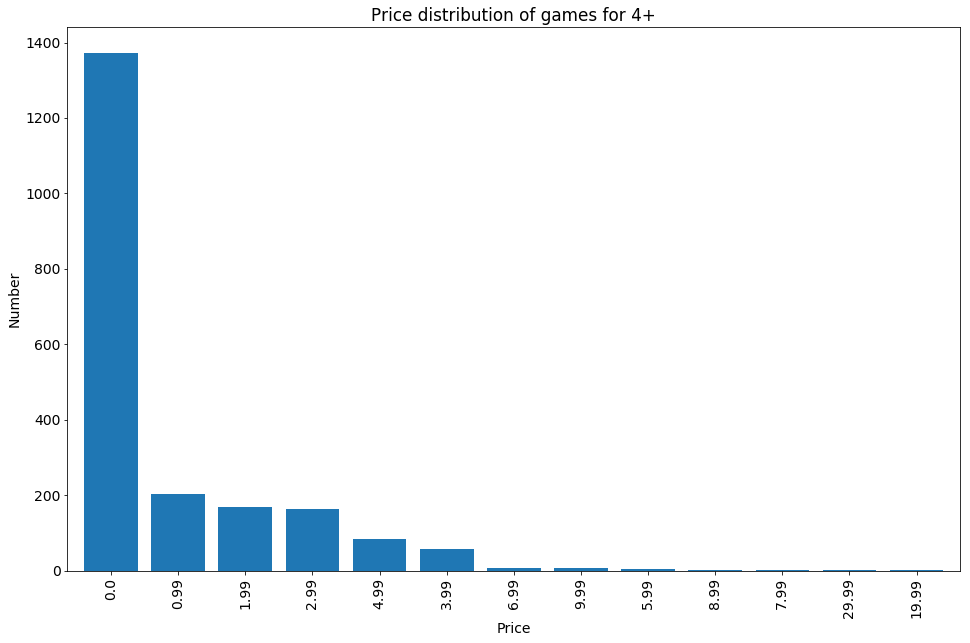

In [80]:
ax = df[(df["prime_genre"] == "Games") & (df["cont_rating"] == "4+")]["price"].value_counts().plot(kind="bar", color="tab:blue", width=0.8, title="Price distribution of games for 4+")
ax.set_xlabel("Price")
ax.set_ylabel("Number")

Text(0,0.5,'number')

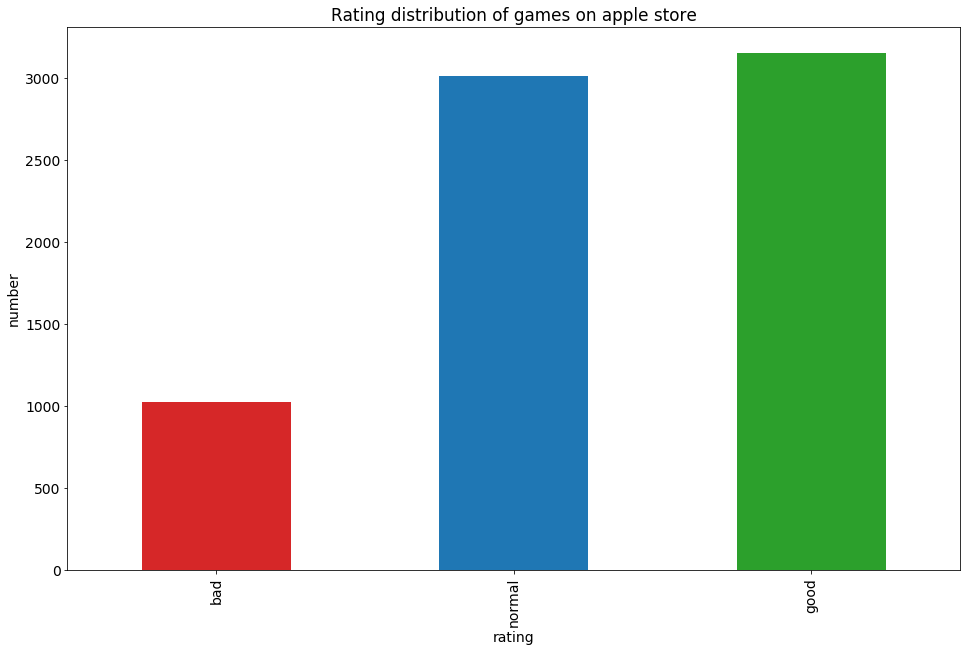

In [81]:
def comment(x):
    if x > 4:
        return "good"
    elif x < 2:
        return "bad"
    else:
        return "normal"
    
df["Game review"] = df["user_rating"].apply(lambda x: comment(x))
comment = df["Game review"].value_counts()
comment = comment[["bad", "normal", "good"]]
ax = comment.plot(kind="bar", color=["tab:red", "tab:blue", "tab:green"], title="Rating distribution of games on apple store")
ax.set_xlabel("rating")
ax.set_ylabel("number")

    


Text(0,0.5,'percentage')

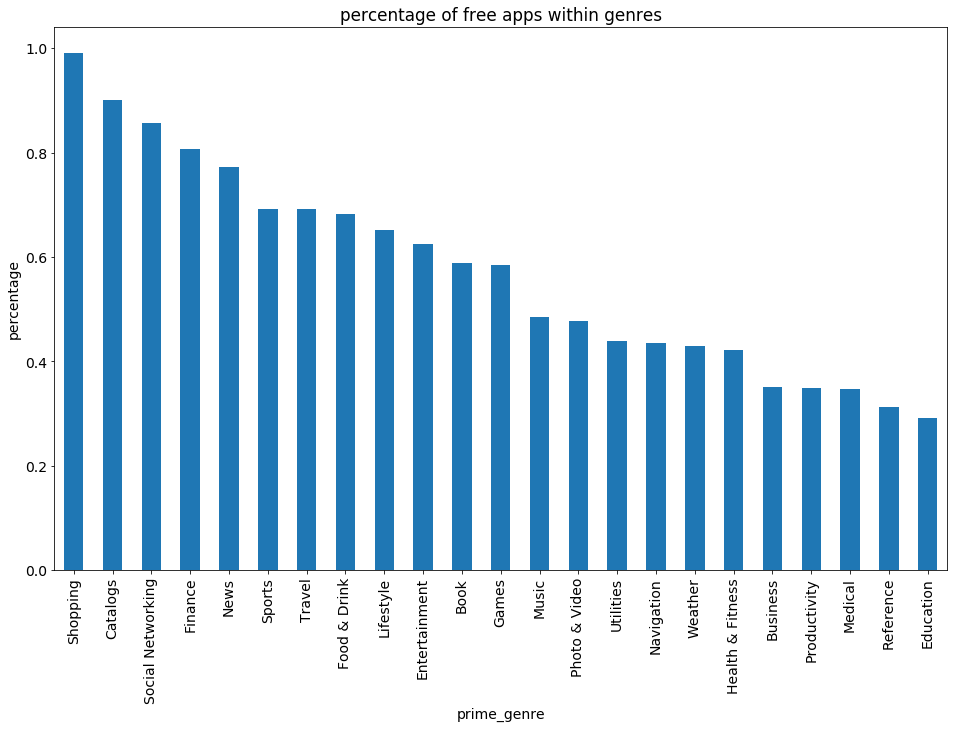

In [93]:
a = df[df["price"] == 0].groupby("prime_genre").count() / df.groupby("prime_genre").count()
a = a.sort_values("id", ascending=False)
ax = a["id"].plot(kind="bar", title="percentage of free apps within genres", color="tab:blue")
ax.set_ylabel("percentage")